In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pickle

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
category_mapping = {
    'Singapore': 1,
    'Sports': 2,
    'Lifestyle': 3,
    'World': 4,
    'Business': 5,
    'Technology': 6
}

In [25]:
#Processed Data Frame [ Do Not Use this, Use the Training, Tesing and Validation Data Sets Instead]
data_path = "./Pickles/all_articles_processed.pickle"
with open(data_path, 'rb') as data:
    all_articles = pickle.load(data)
    
#TD-IDF Features    
#Training Features
training_features_path = "./Pickles/tdidf_training_features.pickle"
with open(training_features_path, 'rb') as data:
    tdidf_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/tdidf_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    tdidf_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/tdidf_test_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/tdidf_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/tdidf_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/tdidf_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_validation_labels = pickle.load(data)
    
    
#Sequence Vector Features    
#Training Features
training_features_path = "./Pickles/sv_training_features.pickle"
with open(training_features_path, 'rb') as data:
    sv_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/sv_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    sv_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/sv_test_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/sv_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/sv_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/sv_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_validation_labels = pickle.load(data)

In [26]:
mnb = MultinomialNB()
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Using TD-IDF Features

In [27]:
mnb.fit(tdidf_training_features, tdidf_training_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
mnb_pred = mnb.predict(tdidf_test_features)

In [29]:
# Training Accuracy
print("The Training Accuracy is: ",accuracy_score(tdidf_training_labels, mnb.predict(tdidf_training_features)))

# Testing Accuracy
print("The Testing Accuracy is: ",accuracy_score(tdidf_test_labels, mnb.predict(tdidf_test_features)))

# Validation Accuracy
print("The Validation Accuracy is: ",accuracy_score(tdidf_validation_labels, mnb.predict(tdidf_validation_features)))

The Training Accuracy is:  0.8916666666666667
The Testing Accuracy is:  0.8138888888888889
The Validation Accuracy is:  0.7722222222222223


In [30]:
%%time
from sklearn.metrics import classification_report
mnb_pred = mnb.predict(tdidf_test_features)

print('accuracy %s' % accuracy_score(mnb_pred, tdidf_test_labels))
print(classification_report(tdidf_test_labels, mnb_pred,target_names=category_mapping))

accuracy 0.8138888888888889
              precision    recall  f1-score   support

   Singapore       0.89      0.78      0.83       130
      Sports       0.97      0.96      0.97       130
   Lifestyle       0.80      0.95      0.87       113
       World       0.83      0.70      0.76       113
    Business       0.66      0.76      0.71       110
  Technology       0.74      0.73      0.73       124

    accuracy                           0.81       720
   macro avg       0.82      0.81      0.81       720
weighted avg       0.82      0.81      0.81       720

Wall time: 183 ms


In [31]:
%%time
from sklearn.metrics import classification_report
mnb_pred = mnb.predict(tdidf_validation_features)

print('accuracy %s' % accuracy_score(mnb_pred, tdidf_validation_labels))
print(classification_report(tdidf_validation_labels, mnb_pred,target_names=category_mapping))

accuracy 0.7722222222222223
              precision    recall  f1-score   support

   Singapore       0.84      0.74      0.79       133
      Sports       0.96      0.97      0.97       107
   Lifestyle       0.78      0.89      0.83       115
       World       0.76      0.71      0.73       126
    Business       0.62      0.57      0.59       119
  Technology       0.69      0.78      0.73       120

    accuracy                           0.77       720
   macro avg       0.77      0.78      0.77       720
weighted avg       0.77      0.77      0.77       720

Wall time: 176 ms


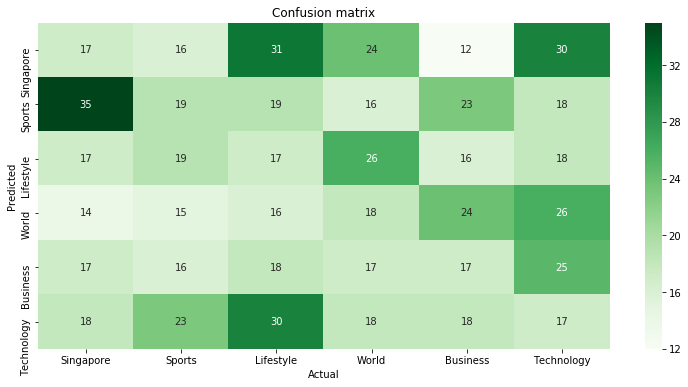

In [32]:
aux_df = all_articles[['category', 'category_code']].drop_duplicates().sort_values('category_code')
conf_matrix = confusion_matrix(tdidf_test_labels, mnb_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=category_mapping, 
            yticklabels=category_mapping,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [33]:
d = {
     'Model': 'Multinomial Naïve Bayes',
    'Features': 'TD-IDF',
     'Training Set Accuracy': accuracy_score(tdidf_training_labels, mnb.predict(tdidf_training_features)),
     'Test Set Accuracy': accuracy_score(tdidf_test_labels, mnb.predict(tdidf_test_features))
}

df_models_mnb = pd.DataFrame(d, index=[0])

In [34]:
df_models_mnb

,Model,Features,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,TD-IDF,0.891667,0.813889


In [35]:
with open('Models/MNB_best_model_tdidf.pickle', 'wb') as output:
    pickle.dump(mnb, output)

## Using Sequence Vector Features

In [36]:
mnb.fit(sv_training_features, sv_training_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
mnb_pred = mnb.predict(sv_test_features)

In [38]:
# Training Accuracy
print("The Training Accuracy is: ",accuracy_score(sv_training_labels, mnb.predict(sv_training_features)))

# Testing Accuracy
print("The Testing Accuracy is: ",accuracy_score(sv_test_labels, mnb.predict(sv_test_features)))

# Validation Accuracy
print("The Validation Accuracy is: ",accuracy_score(sv_validation_labels, mnb.predict(sv_validation_features)))

The Training Accuracy is:  0.23628472222222222
The Testing Accuracy is:  0.2222222222222222
The Validation Accuracy is:  0.1986111111111111


In [39]:
%%time
from sklearn.metrics import classification_report
mnb_pred = mnb.predict(sv_test_features)

print('accuracy %s' % accuracy_score(mnb_pred, sv_test_labels))
print(classification_report(sv_test_labels, mnb_pred,target_names=category_mapping))

accuracy 0.2222222222222222
              precision    recall  f1-score   support

   Singapore       0.00      0.00      0.00       130
      Sports       0.23      0.93      0.37       130
   Lifestyle       0.30      0.08      0.13       113
       World       0.15      0.09      0.11       113
    Business       0.23      0.03      0.05       110
  Technology       0.22      0.14      0.17       124

    accuracy                           0.22       720
   macro avg       0.19      0.21      0.14       720
weighted avg       0.18      0.22      0.14       720

Wall time: 6.98 ms


In [40]:
%%time
from sklearn.metrics import classification_report
mnb_pred = mnb.predict(sv_validation_features)

print('accuracy %s' % accuracy_score(mnb_pred, sv_validation_labels))
print(classification_report(sv_validation_labels, mnb_pred,target_names=category_mapping))

accuracy 0.1986111111111111
              precision    recall  f1-score   support

   Singapore       0.00      0.00      0.00       133
      Sports       0.18      0.89      0.30       107
   Lifestyle       0.37      0.15      0.21       115
       World       0.14      0.06      0.08       126
    Business       0.23      0.04      0.07       119
  Technology       0.24      0.16      0.19       120

    accuracy                           0.20       720
   macro avg       0.19      0.22      0.14       720
weighted avg       0.19      0.20      0.14       720

Wall time: 5.98 ms


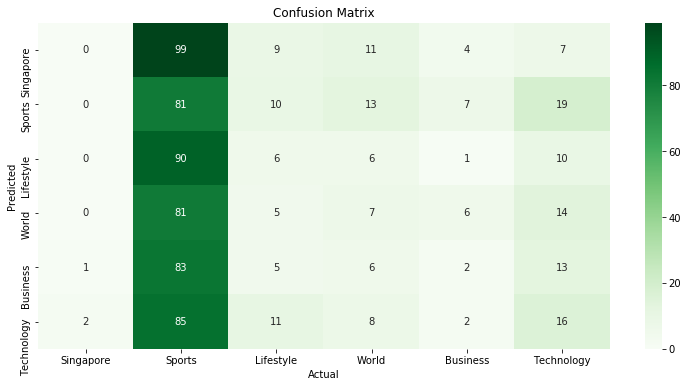

In [41]:
aux_df = all_articles[['category', 'category_code']].drop_duplicates().sort_values('category_code')
conf_matrix = confusion_matrix(sv_test_labels, mnb_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=category_mapping, 
            yticklabels=category_mapping,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
d = {
     'Model': 'Multinomial Naïve Bayes',
    'Features': 'Sequence Vectors',
     'Training Set Accuracy': accuracy_score(sv_training_labels, mnb.predict(sv_training_features)),
     'Test Set Accuracy': accuracy_score(sv_test_labels, mnb.predict(sv_test_features))
}

df_models_mnb_sv = pd.DataFrame(d, index=[0])

In [43]:
df_model_evaluation = df_models_mnb.append(df_models_mnb_sv)
df_model_evaluation

,Model,Features,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,TD-IDF,0.891667,0.813889
0,Multinomial Naïve Bayes,Sequence Vectors,0.236285,0.222222


In [44]:
with open('Models/MNB_best_model_tdidf.pickle', 'wb') as output:
    pickle.dump(mnb, output)
    
with open('Models/MNB_best_model_details.pickle', 'wb') as output:
    pickle.dump(df_model_evaluation, output)